# HR Analytics Project- Understanding the Attrition in HR

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Hr_employee.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Attrition is an target feature.

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

1.There are 35 columns in dataset and 1470 rows.
2.there is no null values present here.
3.NOt any duplicate values are there.
4.there are 26 int typt columns and 9 object type columns.
5.

In [10]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


1.here we can see the difference between 75% and max value in some columns are high it means there outliers are present.
2.if mean is greater than median(50%) it means that column is skewed to left.
3.some column  has equal mean and median and some are skewed to right .
 skewed to right means mean less than median.
4.

In [12]:
# checking the value counts for each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

(array([ 237.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1233.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

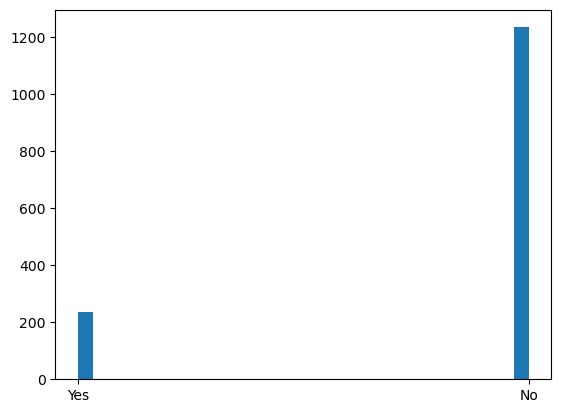

In [13]:
plt.hist(df['Attrition'],bins=30)

attrition :does the employeee leave the organization or not.
As we can see in the graph number of employee who are not leave the organization are more.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

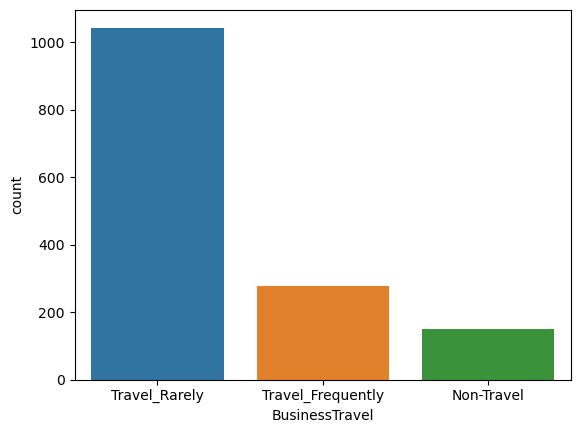

In [14]:
sns.countplot(x= 'BusinessTravel',data=df)

<AxesSubplot:xlabel='Department', ylabel='count'>

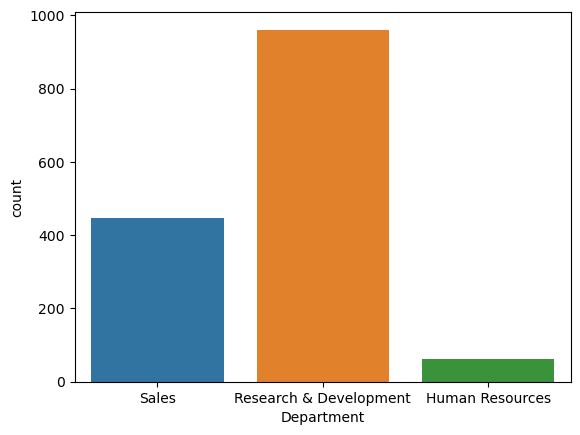

In [15]:
sns.countplot(x= 'Department',data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

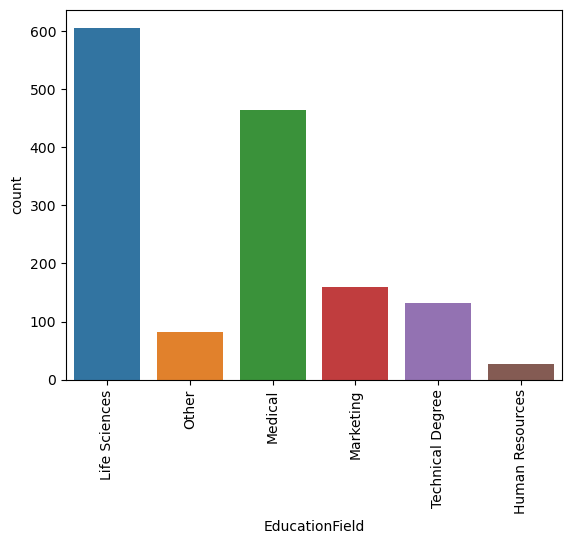

In [16]:
sns.countplot(x= 'EducationField',data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

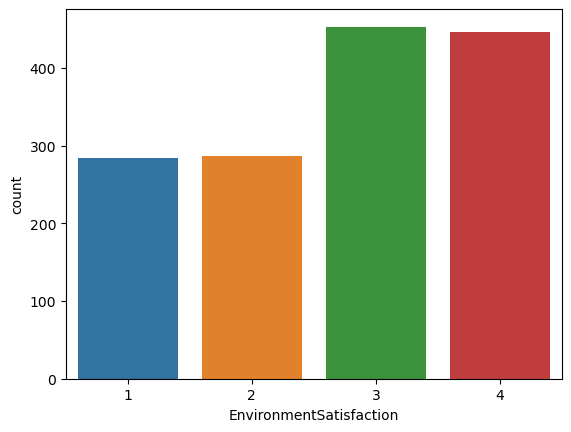

In [17]:
sns.countplot(x= 'EnvironmentSatisfaction',data=df)


<AxesSubplot:xlabel='Gender', ylabel='count'>

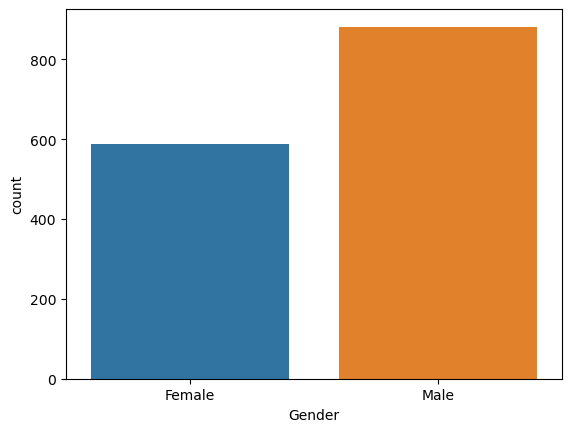

In [18]:
sns.countplot(x= 'Gender',data=df)


<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

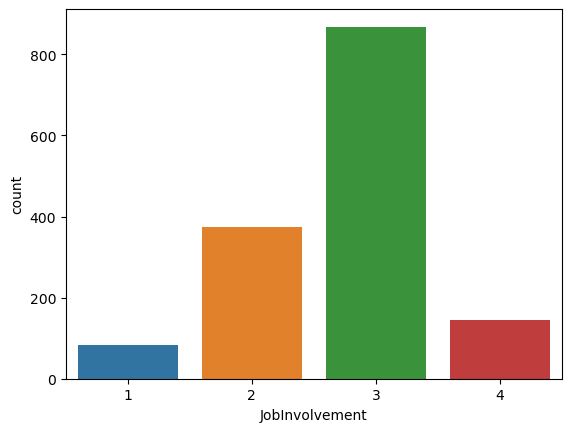

In [19]:
sns.countplot(x= 'JobInvolvement', data=df)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

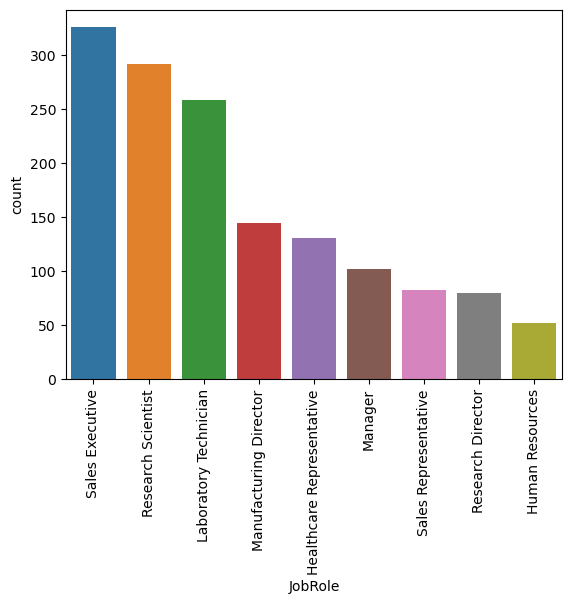

In [20]:
sns.countplot(x= 'JobRole', data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

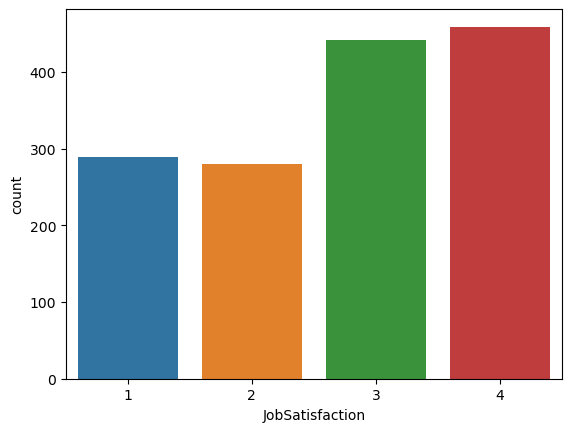

In [21]:
sns.countplot(x= 'JobSatisfaction', data=df)


<AxesSubplot:xlabel='OverTime', ylabel='count'>

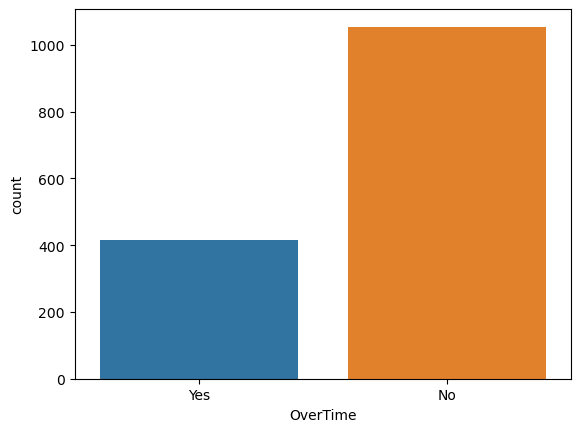

In [22]:
sns.countplot(x= 'OverTime', data=df)


<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

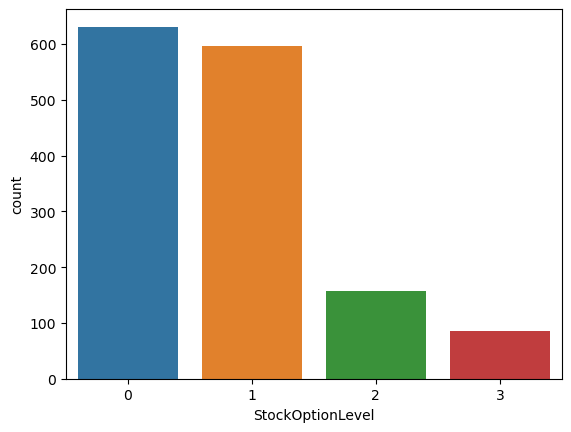

In [23]:
sns.countplot(x= 'StockOptionLevel', data=df)


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

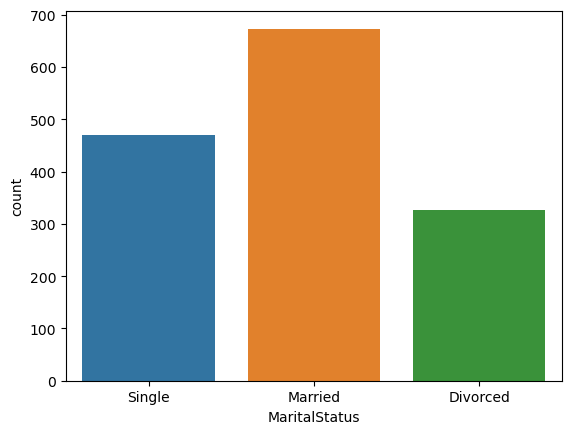

In [24]:
sns.countplot(x= 'MaritalStatus', data=df)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

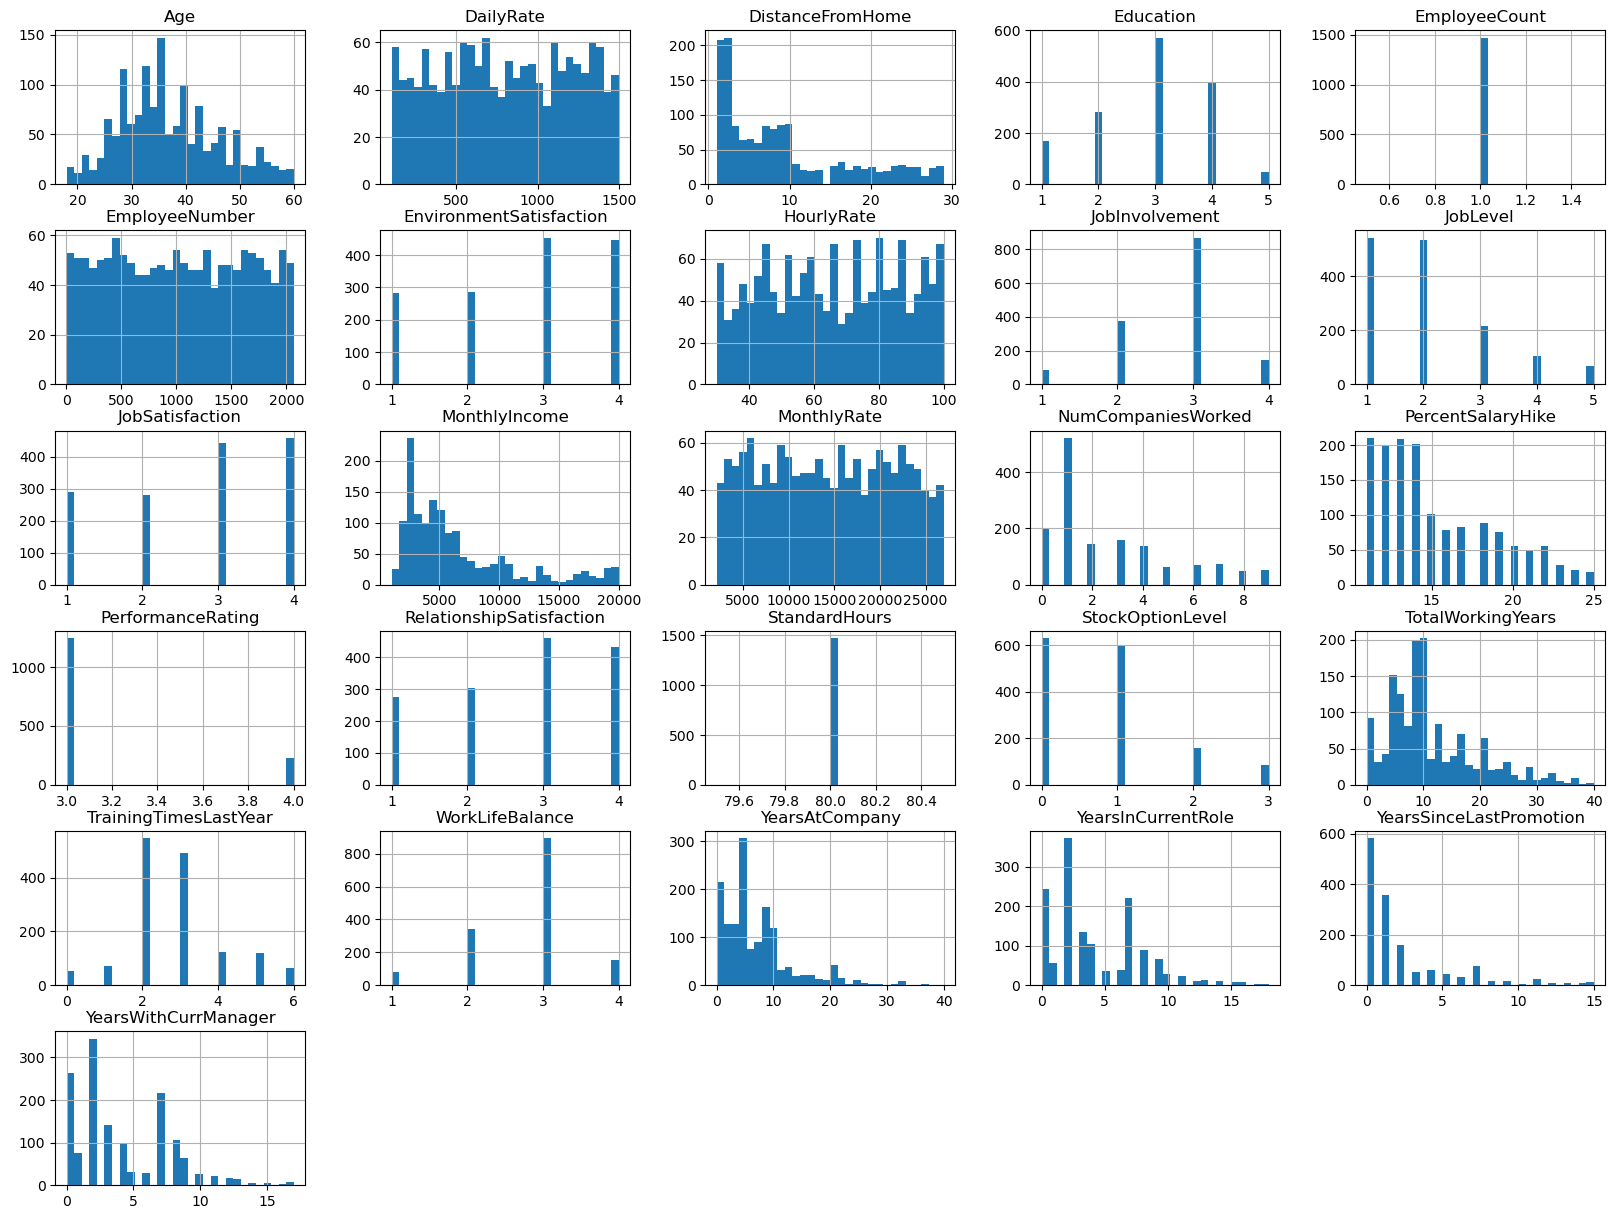

In [25]:
# plotting histogram for checking normal distribution od data
df.hist(figsize = (20,15),grid=True,bins=30)

distribution of integer type feature of dataset.


# seperate categorical and numerical columns

In [48]:
# seperate categorical and numerical columns/
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
print(cat)
print()
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


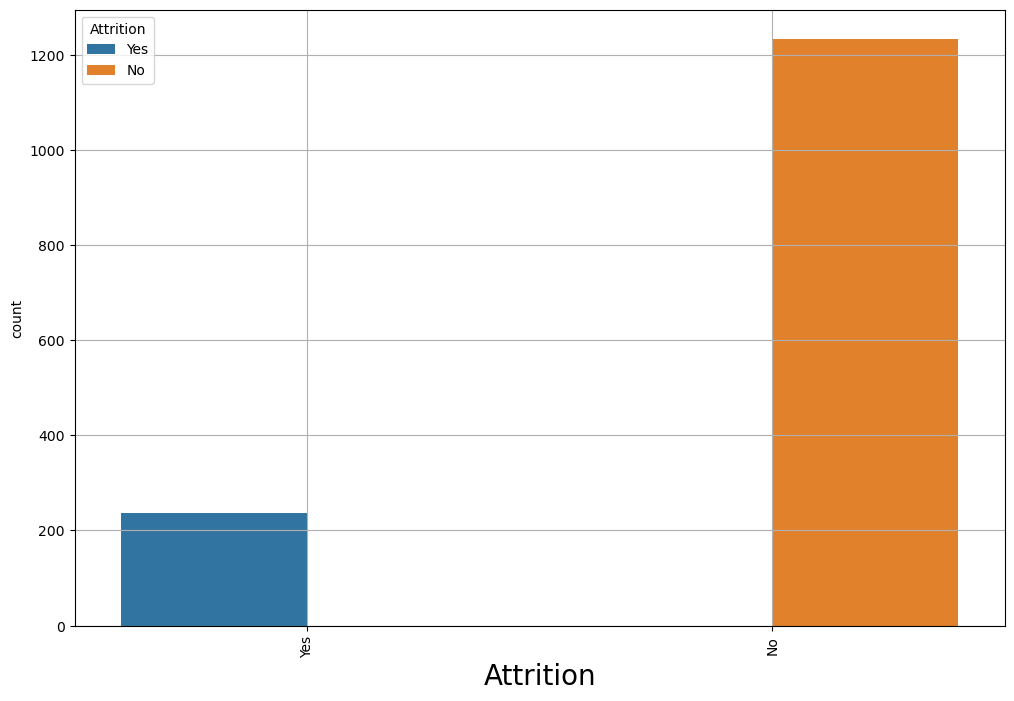

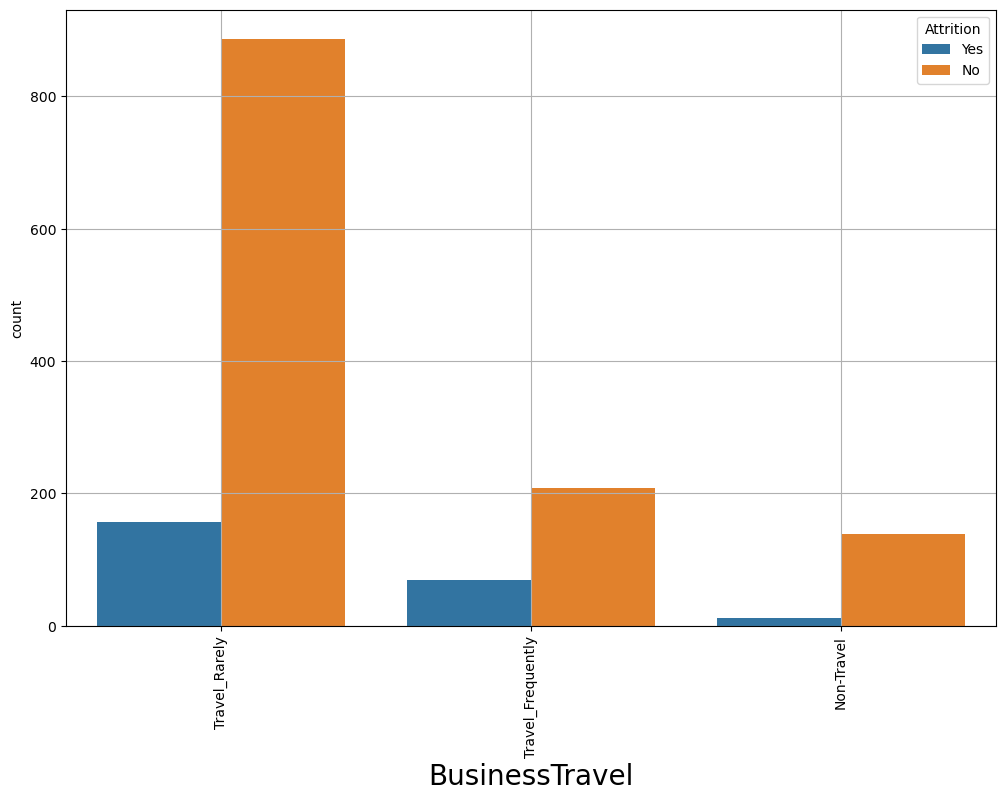

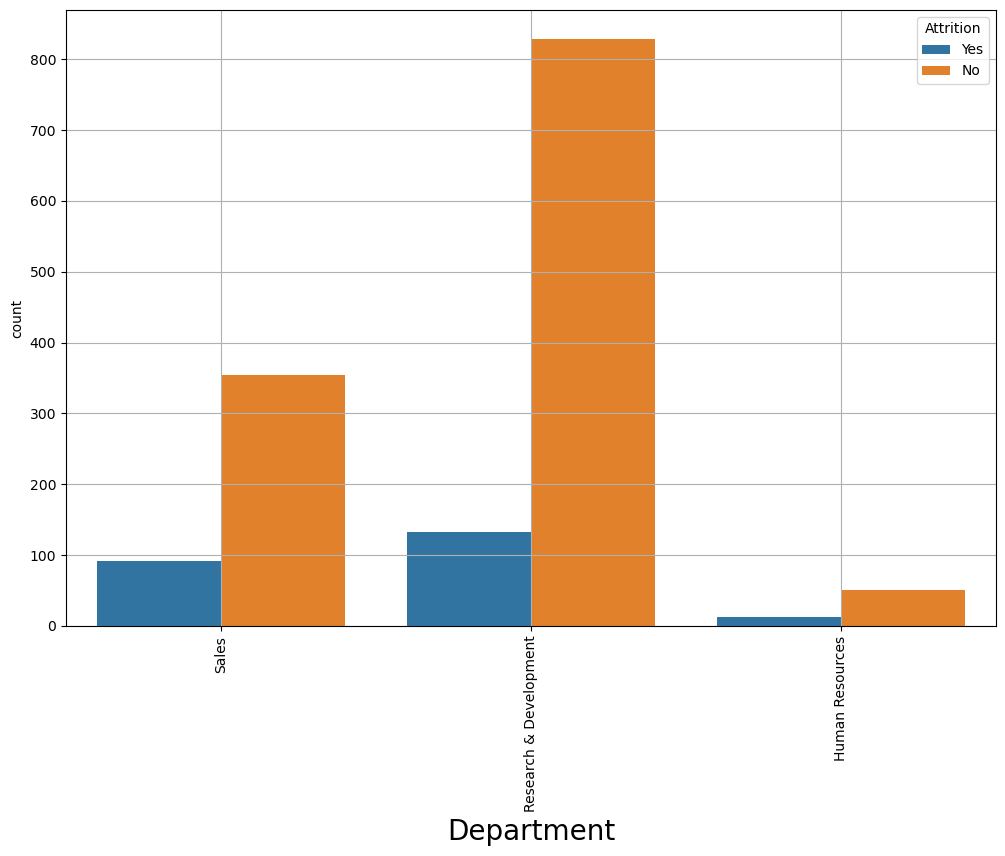

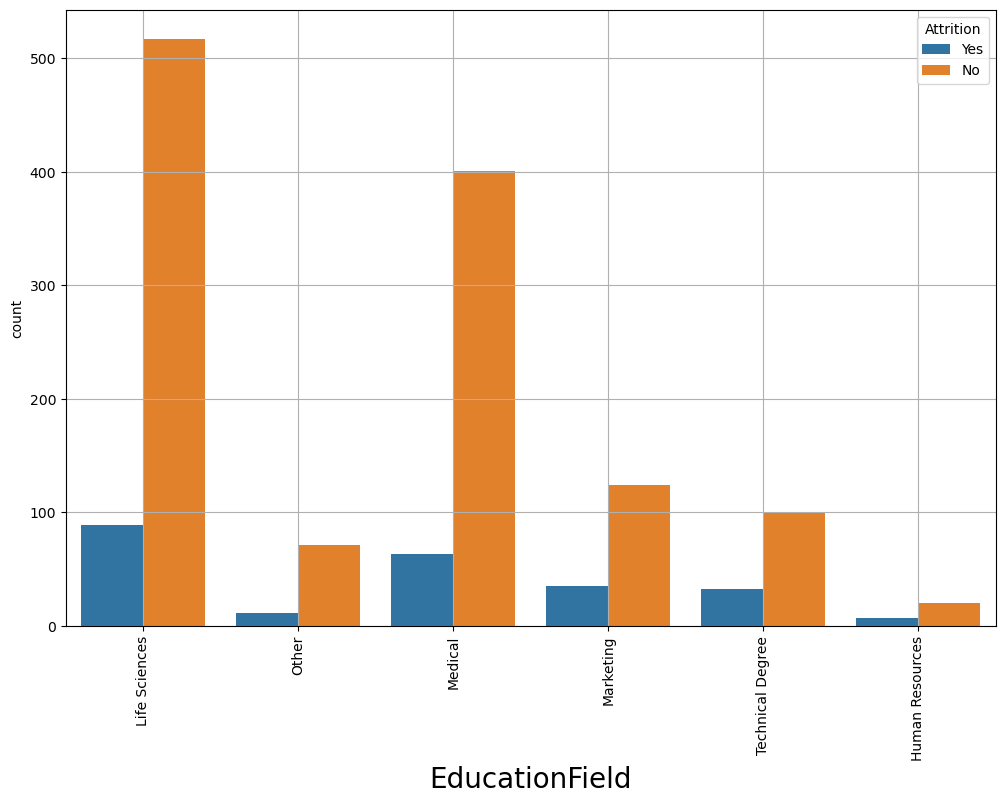

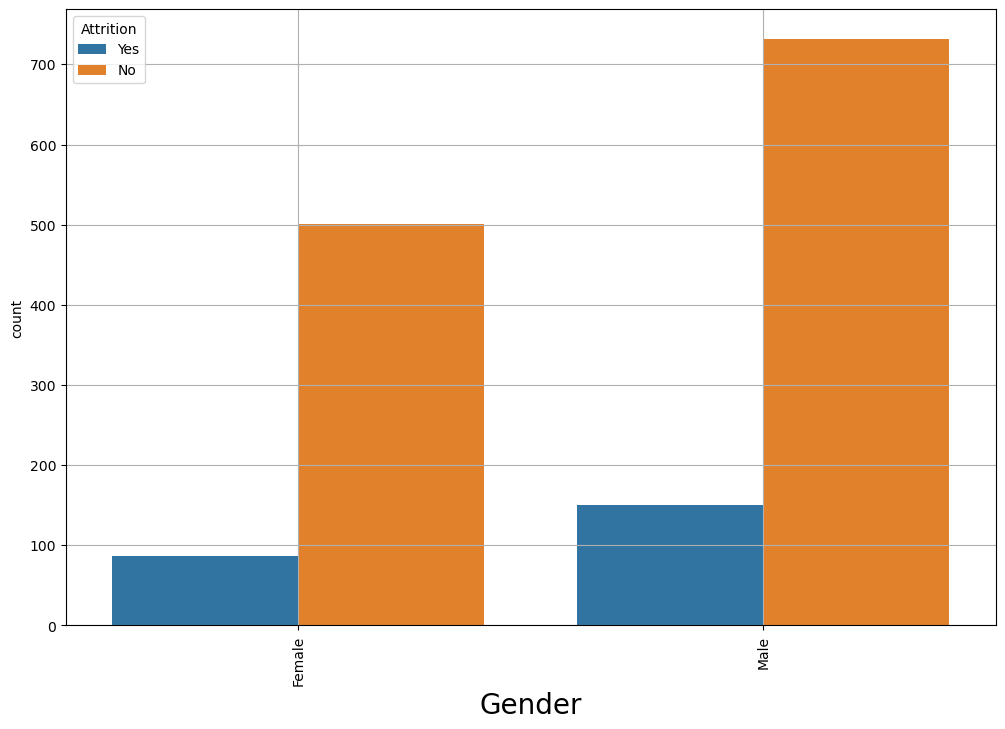

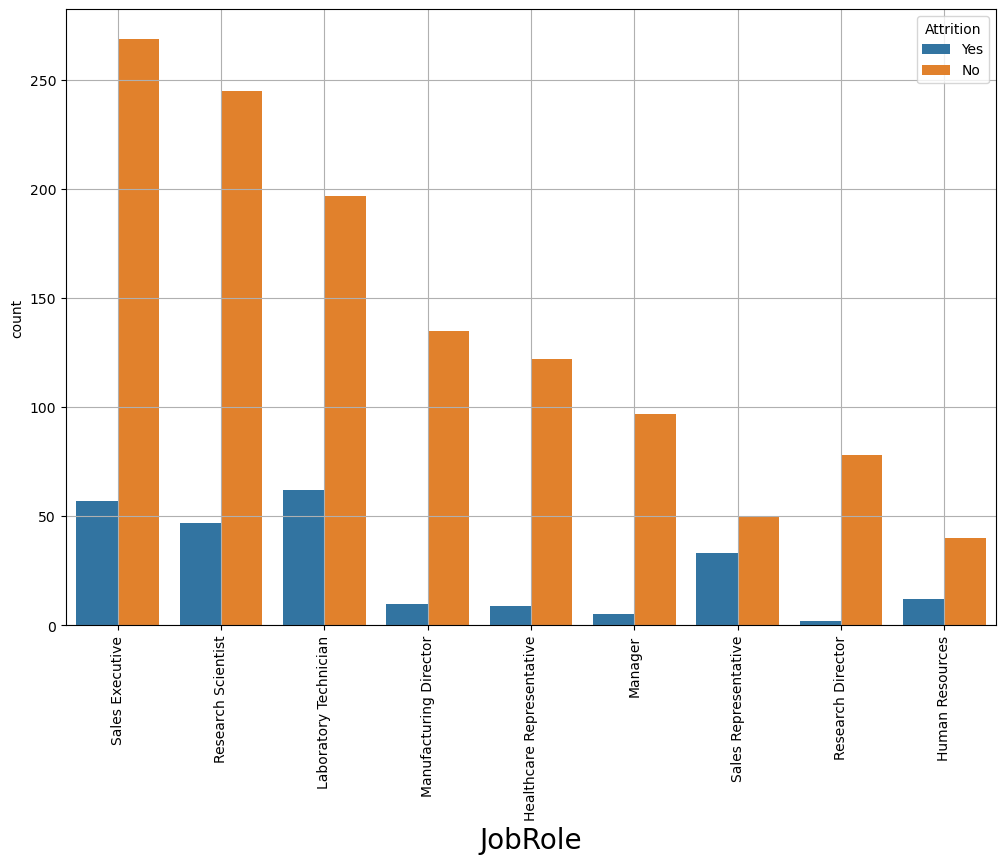

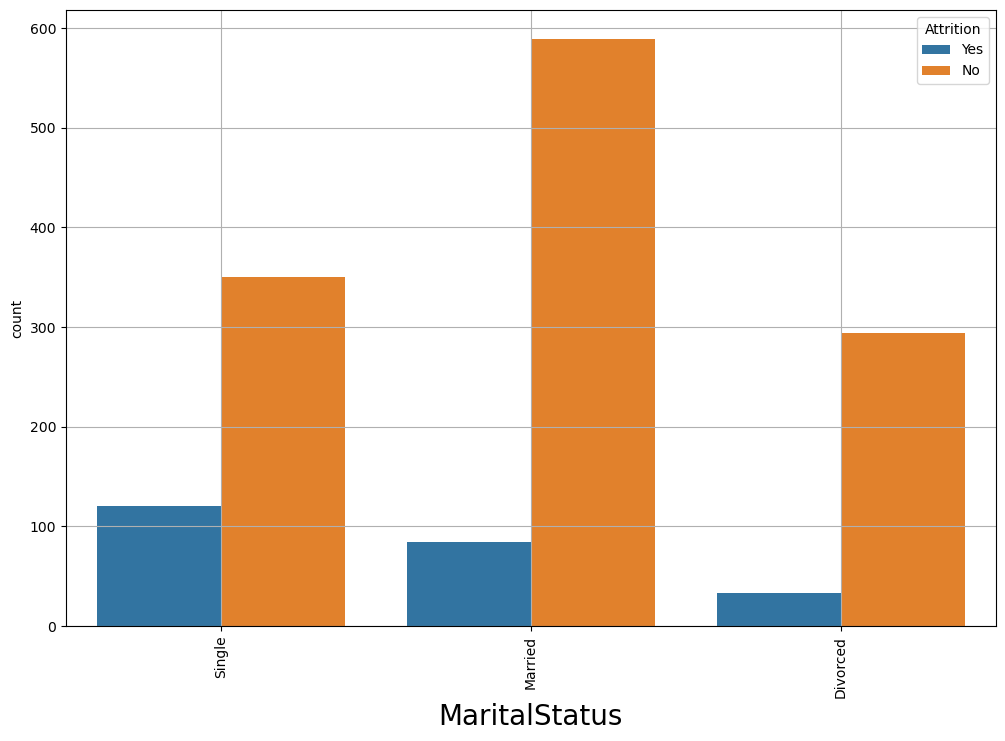

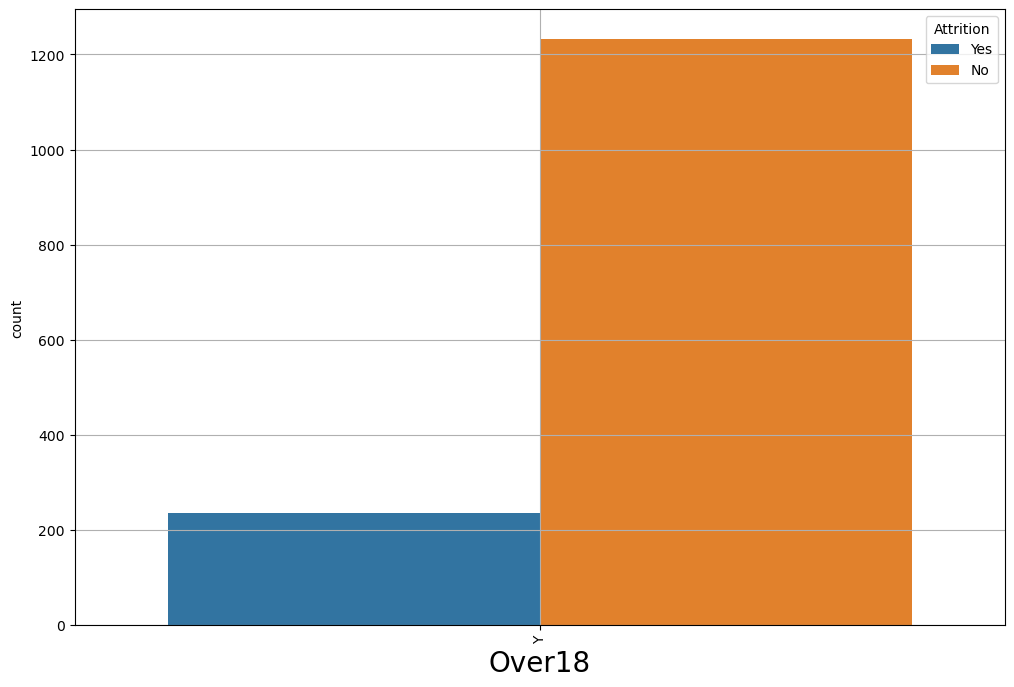

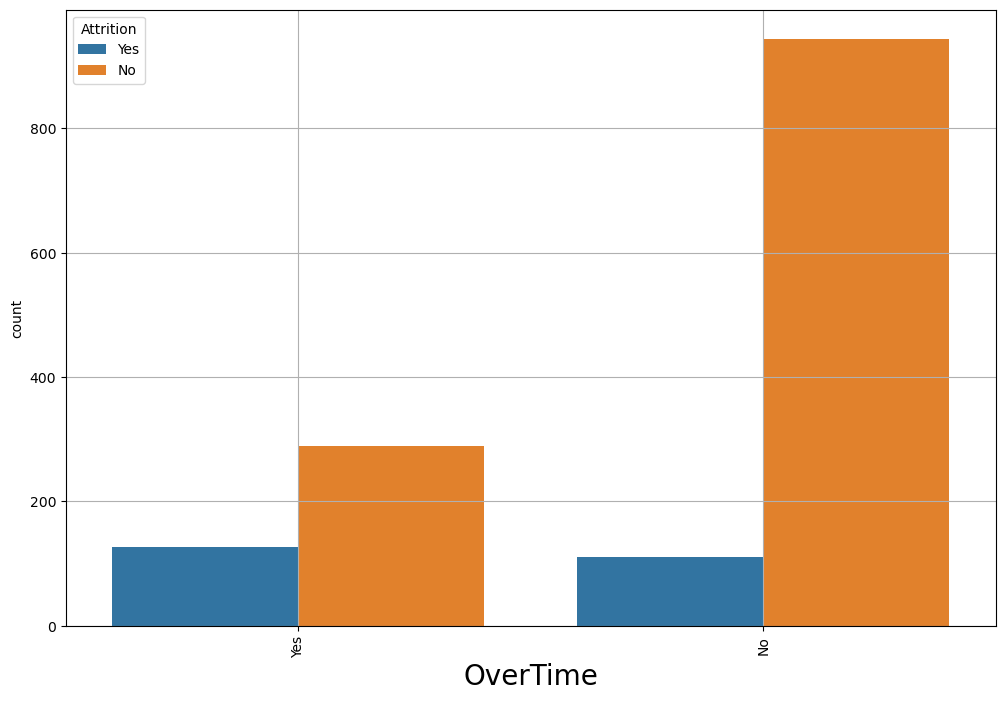

In [27]:
for col in cat:
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=df[col],data=df,hue = 'Attrition')
    plt.xticks(rotation=90)
    plt.xlabel(col,fontsize=20)
    plt.grid()

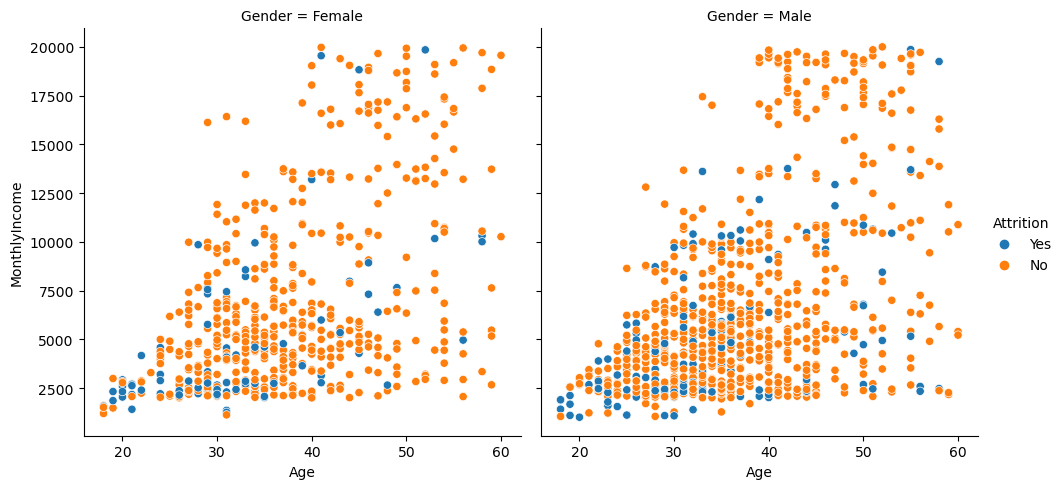

In [28]:
sns.relplot(data=df,y='MonthlyIncome',x="Age",hue='Attrition',col = 'Gender')
plt.show()

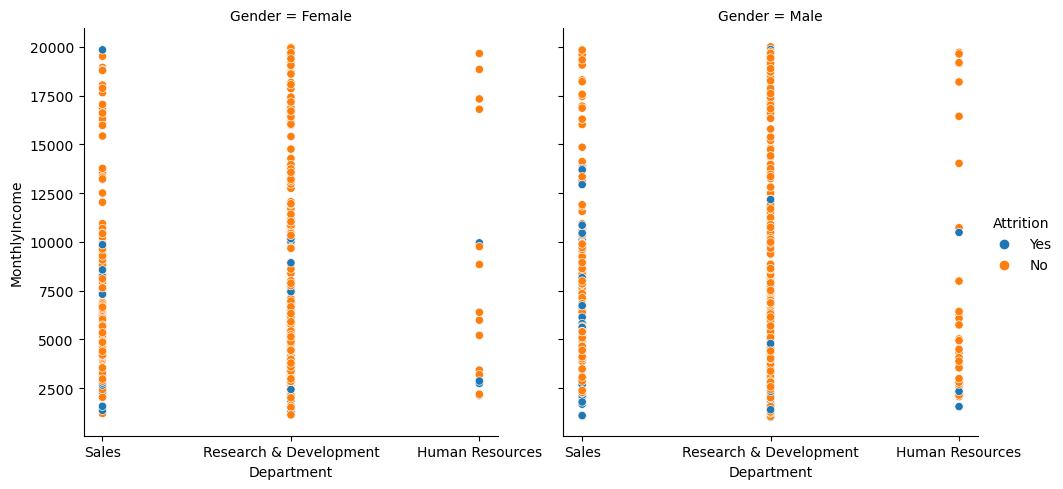

In [29]:
sns.relplot(data=df,y='MonthlyIncome',x="Department",hue='Attrition',col = 'Gender')
plt.show()

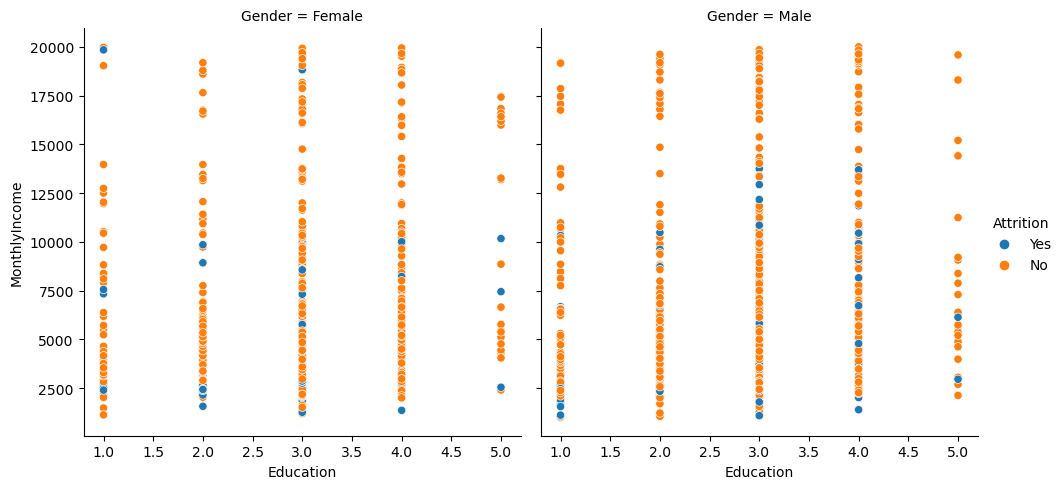

In [30]:
sns.relplot(data=df,y='MonthlyIncome',x="Education",hue='Attrition',col = 'Gender')
plt.show()

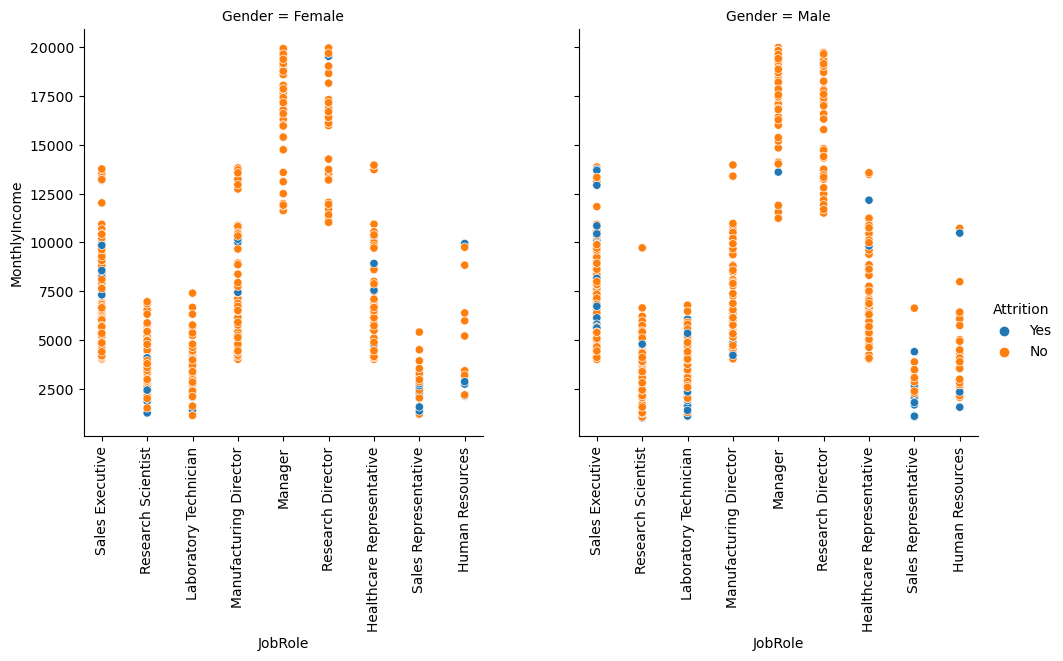

In [31]:
ax = sns.relplot(data=df,y='MonthlyIncome',x="JobRole",hue='Attrition',col = 'Gender')
for i ,ax in enumerate(ax.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

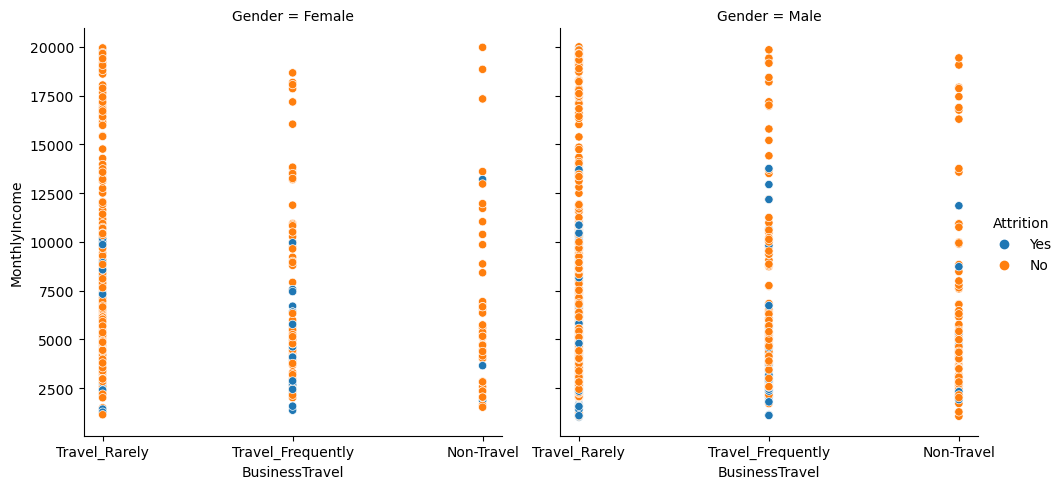

In [32]:
ax = sns.relplot(data=df,y='MonthlyIncome',x="BusinessTravel",hue='Attrition',col = 'Gender')

plt.show()

1.attrition is the highest for those in level 1 jobs.
2.women with the job position manager,research director,and technician laboratory have almost no attrition.
3.men with position of sale expert have lot of attrition.
4.attrition is much and much less in divorsed women
5.As income increase attrition decreases.
6.Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.

# checking for skewness

In [34]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [35]:
sk = ('DistanceFromHome','YearsWithCurrManager', 'JobLevel','YearsAtCompany','YearsSinceLastPromotion', 'TotalWorkingYears',  'StockOptionLevel','MonthlyIncome','NumCompaniesWorked','PerformanceRating')
for col in sk:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [41]:
# columns to drop
drop_col = ['EmployeeCount','StandardHours','Over18']
data = df.drop(columns = drop_col,inplace = True)

In [42]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [43]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [46]:
print(cat.shape)
print(num.shape)

(9,)
(26,)


# checking for outliers

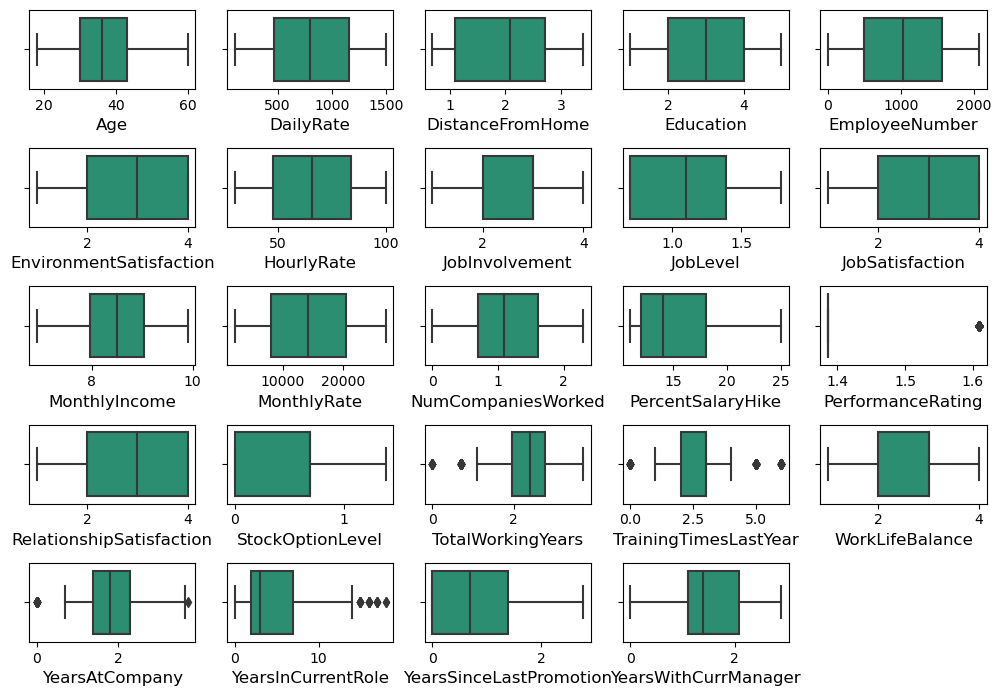

In [49]:
plt.figure(figsize=(10,8),facecolor='white')
plot = 1
for col in num:
    if plot<27:
        ax=plt.subplot(6,5,plot)
        sns.boxplot(df[col],palette = 'Dark2')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot+=1
plt.tight_layout()

# Encoding categorical Features

In [53]:
# remove outliers
from scipy.stats import zscore
zs = np.abs(zscore(df))


In [54]:
threshold = 3
print(np.where(zs<3))
print(df.shape)

(array([   0,    0,    0, ..., 1469, 1469, 1469], dtype=int64), array([ 0,  1,  2, ..., 29, 30, 31], dtype=int64))
(1470, 32)


In [57]:
df_new = df[(zs<3).all(axis=1)]
print(df_new.shape)

(1446, 32)


In [58]:
df = df_new
print('after removing outliers:',df.shape)

after removing outliers: (1446, 32)


# Data Distribution

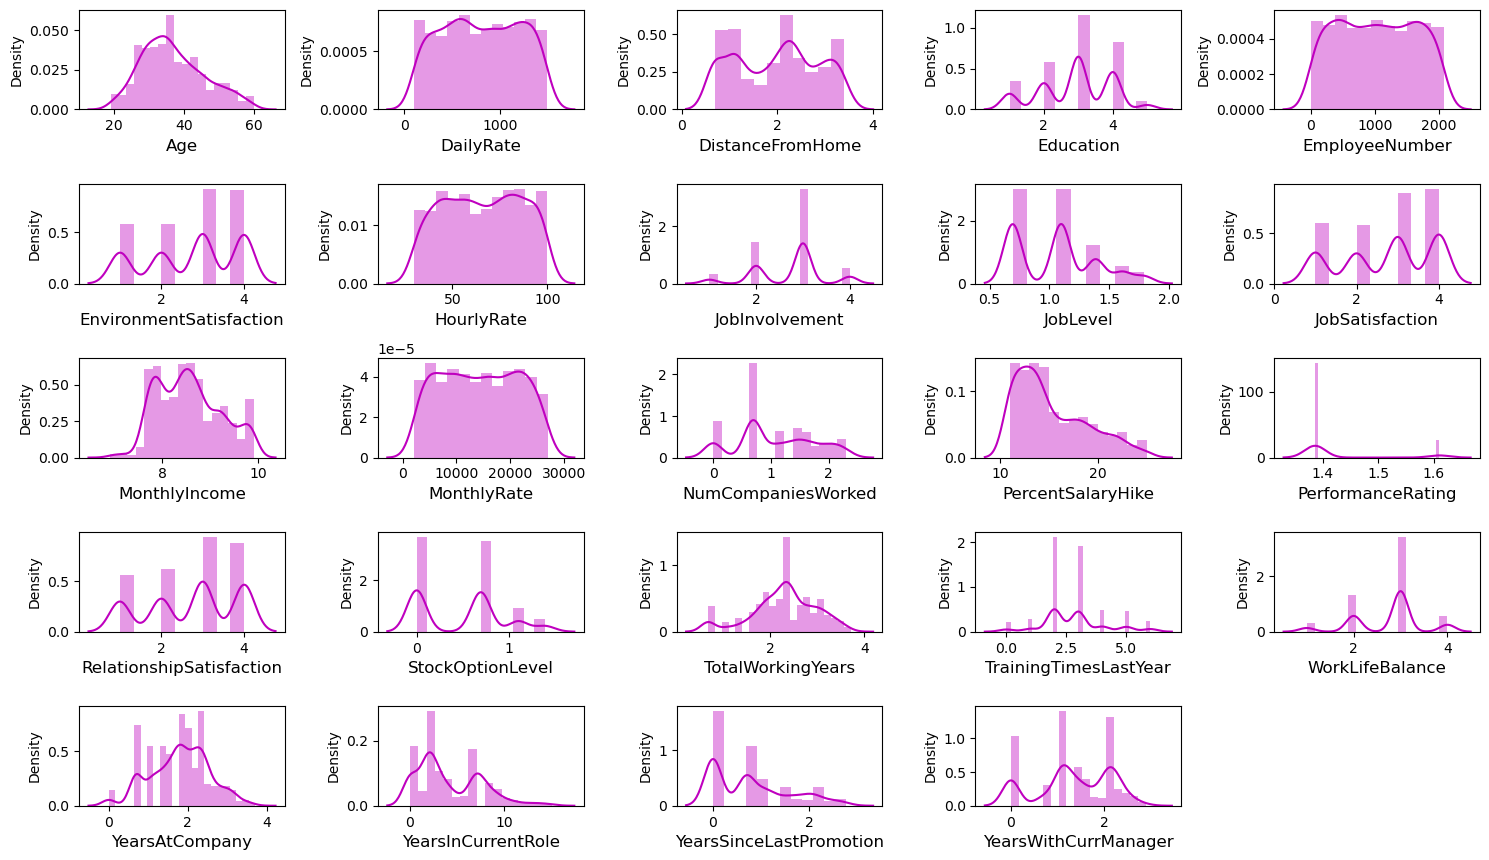

In [60]:
plt.figure(figsize=(15,10),facecolor='white')
plot = 1
for col in num:
    if plot<27:
        ax=plt.subplot(6,5,plot)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plot+=1
plt.tight_layout()

# correlation between Features

In [61]:
cor = df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.147187,0.007303,0.004415,-0.030490,-0.024461,0.204492,-0.041502,-0.011093,0.018358,...,-0.002325,0.065178,0.044149,0.638677,-0.020464,-0.022437,0.229707,0.178224,0.171191,0.145781
Attrition,-0.147187,1.000000,0.002875,-0.054050,0.060029,0.079107,-0.025298,0.027214,-0.008493,-0.107455,...,0.005525,-0.053932,-0.161526,-0.219109,-0.052160,-0.066285,-0.185943,-0.150686,-0.038419,-0.180964
BusinessTravel,0.007303,0.002875,1.000000,-0.008400,-0.014880,-0.009793,-0.006701,0.024093,-0.008490,0.005726,...,-0.026310,-0.032120,-0.016487,0.011296,0.018082,-0.011541,-0.032425,-0.026743,-0.044359,-0.031602
DailyRate,0.004415,-0.054050,-0.008400,1.000000,0.000707,-0.004201,-0.025132,0.039002,-0.052536,0.021500,...,0.002292,0.007325,0.042999,0.015600,0.001696,-0.033361,-0.014227,0.012506,-0.041343,0.001611
Department,-0.030490,0.060029,-0.014880,0.000707,1.000000,0.029466,0.009101,0.013399,-0.007290,-0.016823,...,-0.025650,-0.026152,-0.007551,-0.000332,0.039549,0.027365,0.022275,0.059687,0.029267,0.024321
DistanceFromHome,-0.024461,0.079107,-0.009793,-0.004201,0.029466,1.000000,0.022881,0.008334,0.034944,-0.012122,...,0.013682,0.009291,0.029386,-0.002571,-0.013104,-0.016550,0.009269,0.011822,0.000488,0.003968
Education,0.204492,-0.025298,-0.006701,-0.025132,0.009101,0.022881,1.000000,-0.040114,0.040054,-0.025931,...,-0.019434,-0.001680,0.010748,0.170358,-0.028202,0.009519,0.053850,0.058766,0.038468,0.047331
EducationField,-0.041502,0.027214,0.024093,0.039002,0.013399,0.008334,-0.040114,1.000000,-0.009993,0.044586,...,-0.002536,-0.006212,-0.020592,-0.017935,0.050460,0.041996,-0.003627,-0.012239,0.013178,0.013624
EmployeeNumber,-0.011093,-0.008493,-0.008490,-0.052536,-0.007290,0.034944,0.040054,-0.009993,1.000000,0.018579,...,-0.019970,-0.066292,0.053886,-0.008013,0.027776,0.008799,0.010054,-0.007491,0.007494,-0.000910
EnvironmentSatisfaction,0.018358,-0.107455,0.005726,0.021500,-0.016823,-0.012122,-0.025931,0.044586,0.018579,1.000000,...,-0.028867,0.010681,0.010783,-0.010527,-0.018389,0.031285,0.022315,0.040814,0.031972,0.010746


1.There is strong positive correlation between enployee's age and their working years.
2.joblevel and monthly income have a strong positive correlation,it means job level are associated with higher monthly incomes.
3.There is negative correlation between attrition and their age.it suggest that younger employees may be more likely to leave the company.
4.Attrition and joblevel have negative correlation indicating that employees at lower job level may be more likely to leave the company.


In [62]:
# checking correlation of every feature with target variable
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.241695
MaritalStatus               0.155972
DistanceFromHome            0.079107
JobRole                     0.065976
Department                  0.060029
NumCompaniesWorked          0.042972
EducationField              0.027214
Gender                      0.025301
MonthlyRate                 0.008642
PerformanceRating           0.005525
BusinessTravel              0.002875
HourlyRate                 -0.004978
EmployeeNumber             -0.008493
PercentSalaryHike          -0.012022
Education                  -0.025298
YearsSinceLastPromotion    -0.038419
TrainingTimesLastYear      -0.052160
RelationshipSatisfaction   -0.053932
DailyRate                  -0.054050
WorkLifeBalance            -0.066285
JobSatisfaction            -0.106004
EnvironmentSatisfaction    -0.107455
JobInvolvement             -0.135188
Age                        -0.147187
YearsInCurrentRole         -0.150686
StockOptionLevel           -0.161526
J

# Seperating Feature and Label

In [63]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

# Feature Scaling using Satndard Scalarization

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale = StandardScaler()
ax = pd.DataFrame(scale.fit_transform(x),columns = x.columns)


# Modeling

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 42)

In [70]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1012, 31)
(1012,)
(434, 31)
(434,)


In [72]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8502304147465438
[[362   1]
 [ 64   7]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       363
         1.0       0.88      0.10      0.18        71

    accuracy                           0.85       434
   macro avg       0.86      0.55      0.55       434
weighted avg       0.85      0.85      0.80       434



In [73]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8410138248847926
[[363   0]
 [ 69   2]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       363
         1.0       1.00      0.03      0.05        71

    accuracy                           0.84       434
   macro avg       0.92      0.51      0.48       434
weighted avg       0.87      0.84      0.77       434



In [74]:
sv = SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.836405529953917
[[363   0]
 [ 71   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       363
         1.0       0.00      0.00      0.00        71

    accuracy                           0.84       434
   macro avg       0.42      0.50      0.46       434
weighted avg       0.70      0.84      0.76       434



In [75]:
gr = GradientBoostingClassifier()
gr.fit(x_train,y_train)
predgr = gr.predict(x_test)
print(accuracy_score(y_test,predgr))
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

0.847926267281106
[[355   8]
 [ 58  13]]
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       363
         1.0       0.62      0.18      0.28        71

    accuracy                           0.85       434
   macro avg       0.74      0.58      0.60       434
weighted avg       0.82      0.85      0.81       434



In [76]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8502304147465438
[[346  17]
 [ 48  23]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       363
         1.0       0.57      0.32      0.41        71

    accuracy                           0.85       434
   macro avg       0.73      0.64      0.66       434
weighted avg       0.83      0.85      0.83       434



In [77]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)
predbg = bg.predict(x_test)
print(accuracy_score(y_test,predbg))
print(confusion_matrix(y_test,predbg))
print(classification_report(y_test,predbg))

0.847926267281106
[[351  12]
 [ 54  17]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91       363
         1.0       0.59      0.24      0.34        71

    accuracy                           0.85       434
   macro avg       0.73      0.60      0.63       434
weighted avg       0.82      0.85      0.82       434



In [79]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

0.8502304147465438
[[360   3]
 [ 62   9]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       363
         1.0       0.75      0.13      0.22        71

    accuracy                           0.85       434
   macro avg       0.80      0.56      0.57       434
weighted avg       0.84      0.85      0.80       434



# Cross Validation Score

In [80]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('diff between accuracy score and cross validation score is:',accuracy_score(y_test,predrfc)-score.mean())

[0.85172414 0.8615917  0.8650519  0.85467128 0.8615917 ]
0.8589261424650996
diff between accuracy score and cross validation score is: -0.008695727718555757


In [81]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('diff between accuracy score and cross validation score is:',accuracy_score(y_test,predlr)-score.mean())

[0.84137931 0.83737024 0.84083045 0.84083045 0.84083045]
0.8402481804080658
diff between accuracy score and cross validation score is: 0.0007656444767267789


In [82]:
score = cross_val_score(sv,x,y)
print(score)
print(score.mean())
print('diff between accuracy score and cross validation score is:',accuracy_score(y_test,predsv)-score.mean())

[0.83793103 0.83737024 0.84083045 0.84083045 0.84083045]
0.839558525235652
diff between accuracy score and cross validation score is: -0.0031529952817349605


In [83]:
score = cross_val_score(gr,x,y)
print(score)
print(score.mean())
print('diff between accuracy score and cross validation score is:',accuracy_score(y_test,predgr)-score.mean())

[0.85862069 0.85813149 0.87889273 0.8615917  0.8650519 ]
0.8644577019448754
diff between accuracy score and cross validation score is: -0.016531434663769384


In [84]:
score = cross_val_score(et,x,y)
print(score)
print(score.mean())
print('diff between accuracy score and cross validation score is:',accuracy_score(y_test,predet)-score.mean())

[0.84137931 0.85467128 0.87543253 0.85467128 0.8615917 ]
0.8575492184703496
diff between accuracy score and cross validation score is: -0.007318803723805778


In [85]:
score = cross_val_score(ad,x,y)
print(score)
print(score.mean())
print('diff between accuracy score and cross validation score is:',accuracy_score(y_test,predad)-score.mean())

[0.84827586 0.8615917  0.87197232 0.85467128 0.84083045]
0.8554683212027203
diff between accuracy score and cross validation score is: -0.0052379064561765


# Hyper Parameter Tunning

In [86]:
param = {'n_estimators':[100,200,300],
        'learning_rate':[0.01,0.1,0.2],
        'max_depth':[3,4,5]}

In [87]:
grid = GridSearchCV(estimator = GradientBoostingClassifier(),param_grid=param,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [88]:
best_params = grid.best_params_
best_model = grid.best_estimator_

In [89]:
print(best_params)#best hyper parameter
print(best_model)#best model

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
GradientBoostingClassifier(n_estimators=300)


In [90]:
accuracy = best_model.score(x_test,y_test)

In [91]:
print(accuracy)

0.836405529953917


In [109]:
final_model = GradientBoostingClassifier(learning_rate=0.2,max_depth=3,n_estimators = 100)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

85.71428571428571


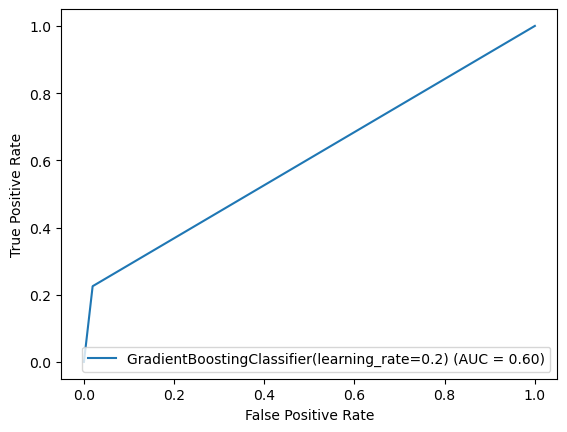

In [110]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
dis = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
dis.plot()

Here we have plotted ROC curve for the finalmodel and the AUC value for the best model is 60%


# Saving model

In [113]:
import joblib
joblib.dump(final_model,'Hr_Analytics.pkl')

['Hr_Analytics.pkl']

In [114]:
model = joblib.load('Hr_Analytics.pkl')
# predicting
pred = model.predict(x_test)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [115]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = pred
df['Original'] = a

In [116]:
df

,Predicted,Original
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
429,0.0,1.0
430,0.0,0.0
431,0.0,0.0
432,0.0,0.0


-----------------------------------------------------------------------------------------------------------------------------------